<b>Making new images with multiple MNIST digits</b>

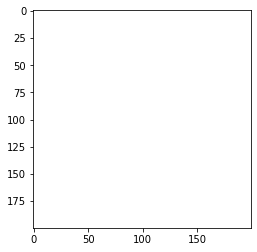

<class 'numpy.ndarray'>


In [3]:
import cv2
import random
import numpy as np
import matplotlib.pyplot as plt
import PIL 
whiteblankimage = 255 * np.ones(shape=[200, 200,3], dtype=np.uint8)


#cv2.rectangle(whiteblankimage, pt1=(200,200), pt2=(300,300), color=(0,0,255), thickness=10)

plt.imshow(whiteblankimage)

plt.show()

print(type(whiteblankimage))
bg=PIL.Image.fromarray(whiteblankimage)

In [5]:
import cv2
import numpy 
# scipy.special for the sigmoid function: expit()
import scipy.special
# library for plotting arrays
import matplotlib.pyplot 
# ensure the plots are inside this notebook, not an external window
%matplotlib inline
import PIL
import random
import array

In [6]:
# Import the original data csv file

test_data_file = open("one.csv",'r')         # r means open the file to read (only)
test_data_list = test_data_file.readlines()     # read the file as lines / records
test_data_file.close()                         # always close the file

        Label =  7


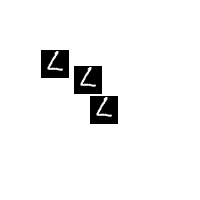

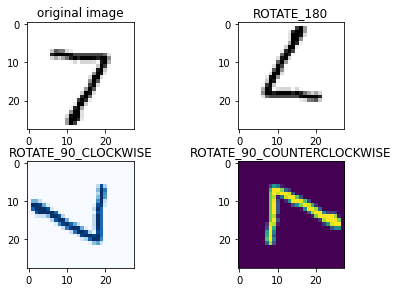

In [11]:
# read the data from the long list (test_data_list) convert the data into a 28 x 28 array, then plot


new_list=[]  #empty list
for record in test_data_list:                  # test_data_list is all the values in the test file
    all_values = record.split(',')             # split each record (image) into values seperated by commas
    correct_label = int(all_values[0])         # the first value is the lable
    inputs = (numpy.asfarray(all_values[1:]))    
    
    
    image = numpy.asfarray(inputs.reshape((28,28)))    # the list is made into an array
    
    
    #matplotlib.pyplot.imshow(image, cmap = 'Greys',interpolation='nearest') 
    #matplotlib.pyplot.get_cmap('Blues')        #different color
    #matplotlib.pyplot.figure(count)             # make a figure out of the array
    #matplotlib.pyplot.show()                    # show the current image


    print("        Label = ",correct_label)
    image2= cv2.rotate(image, cv2.ROTATE_180)    #rotate the image by fix value of angle
    #matplotlib.pyplot.imshow(image2)            #show the modified image
    #other options
    rotate_90 = cv2.rotate(image, cv2.ROTATE_90_CLOCKWISE)   
    rotate_90_counter = cv2.rotate(image, cv2.ROTATE_90_COUNTERCLOCKWISE) 
       

    #subplot(r,c) provide the no. of rows and columns
    fig, axs = matplotlib.pyplot .subplots(2,2) 
    #set spaces autonomically between plots
    fig.tight_layout()
    # use the created array to output your multiple images. 
    axs[0, 0].imshow(image,cmap = 'Greys',interpolation='nearest')
    axs[0, 0].set_title('original image')
    axs[0, 1].imshow(image2,cmap = 'Greys',interpolation='nearest')
    axs[0, 1].set_title('ROTATE_180')
    axs[1, 0].imshow(rotate_90,cmap = matplotlib.pyplot.get_cmap('Blues'),interpolation='nearest')
    axs[1, 0].set_title('ROTATE_90_CLOCKWISE')
    axs[1, 1].imshow(rotate_90_counter)
    axs[1, 1].set_title('ROTATE_90_COUNTERCLOCKWISE')
    
    
    # convert the array into PIL.image
    image11=PIL.Image.fromarray(image)
    image22=PIL.Image.fromarray(image2)
    #save the rotated image
    #matplotlib.pyplot.imsave("{}.png".format(count),image2)

    #convert to array with type of integer
    n1=numpy.asarray(image,dtype=int)
    n2=numpy.asarray(image2,dtype=int)
    n3=numpy.asarray(rotate_90,dtype=int)
    n4=numpy.asarray(rotate_90_counter,dtype=int)
     
    #convert to one dimension
    new1=n1.flatten()
    new2=n2.flatten()
    new3=n3.flatten()
    new4=n4.flatten()
    #combine label with 784 pixel values
    new1= numpy.concatenate(([correct_label],new1))
    new2= numpy.concatenate(([correct_label],new2))
    new3= numpy.concatenate(([correct_label],new3))
    new4= numpy.concatenate(([correct_label],new4))

    #append the list of pixels values to the empty list
    new_list.append(new1)
    new_list.append(new2)
    new_list.append(new3)
    new_list.append(new4)

    #append two digit images to the background image
    width, height = 200,200
    x = random.randint(20, width-40)
    y = random.randint(20, height-40)
    bg.paste(image11, (x, y))
    bg.paste(image22, (x, y))
    
    #bg.save('‪result.png', 'PNG')
    display(bg)

    #print(type(image))   
#save the four rows of pixel values into a new csv file
numpy.savetxt("one_task1.csv", new_list,delimiter=',', fmt='%d',newline='\n')    